# Masking of images using Python OpenCV



Masking is used in Image Processing to output the Region of Interest, or simply the part of the image that we are interested in.

We tend to use bitwise operations for masking as it allows us to discard the parts of the image that we do not need.

# The process of masking images

We have three steps in masking.

1. Creating a black canvas with the same dimensions as the image, and naming it as mask.

2. Changing the values of the mask by drawing any figure in the image and providing it with a white color.

3. Performing the bitwise ADD operation on the image with the mask.

## Learning Outcome

1. Find histogram of the region of interest using the image mask.
2. Apply Image Mask in binary image.
3. Bitwise operation in the binary images.



## Image masks and binary operations


You have already learned about histogram. Suppose let's say we want a histogram of Image on some region only. 



<image>
<center>


<p>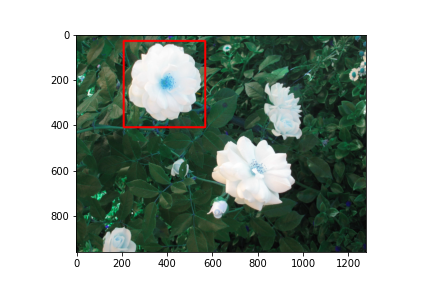</p>
<Figcaption>Figure 1: Image with region of interest </Figcaption>
</center>
</image>




In the above figure, the Red rectangle shows a region of interest, i.e., the region you want to find histogram. In the following section, we will explain how to find a histogram of the region of interest.


__Step 1:__

1. Create a binary Image with white color in a region you want to find histogram and set rest value zero. This binary Image is called Mask. 


<image>
<center>


<p>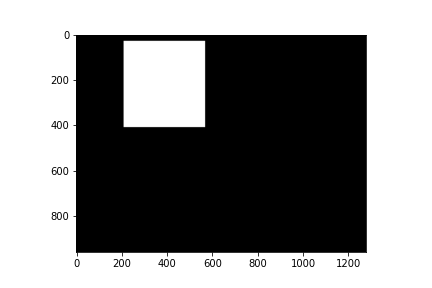</p>
<Figcaption>Figure 2: Mask </Figcaption>
</center>
</image>


In our problem, 


The binary mask defines a region of interest in the original image. Here in this diagram, Our region of interest is that flower inside a red rectangle. 
* Mask pixel values of 1 indicate the image pixel belongs to a region of interest. 
* Mask pixel values of 0 indicate the image pixel is part of the background.

Then In the given image, black color is part of the background, while white color indicates a region of interest. 



__Step 2:__
2. Apply this mask on original Image(Bitwise AND) to get masked image.




<image>
<center>


<p>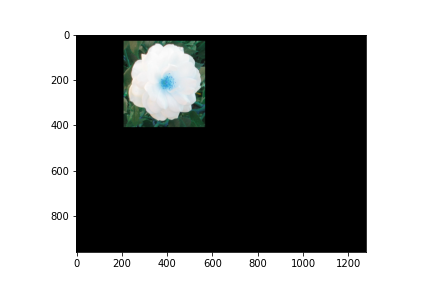</p>
<Figcaption>Figure 3: Masked Image</Figcaption>
</center>
</image>

Image masking involves adding some other photo to the original image as a mask or adjusting the pixel values in the image.



**Step 3:**
3. Plot the masked image histogram. 


<image>
<center>


<p>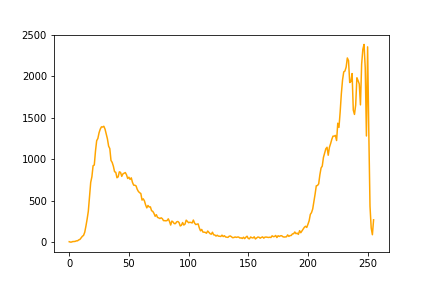</p>
<Figcaption>Figure 4: Masked Image Histogram</Figcaption>
</center>
</image>



You can compare the result of the overall steps. 




<image>
<center>


<p>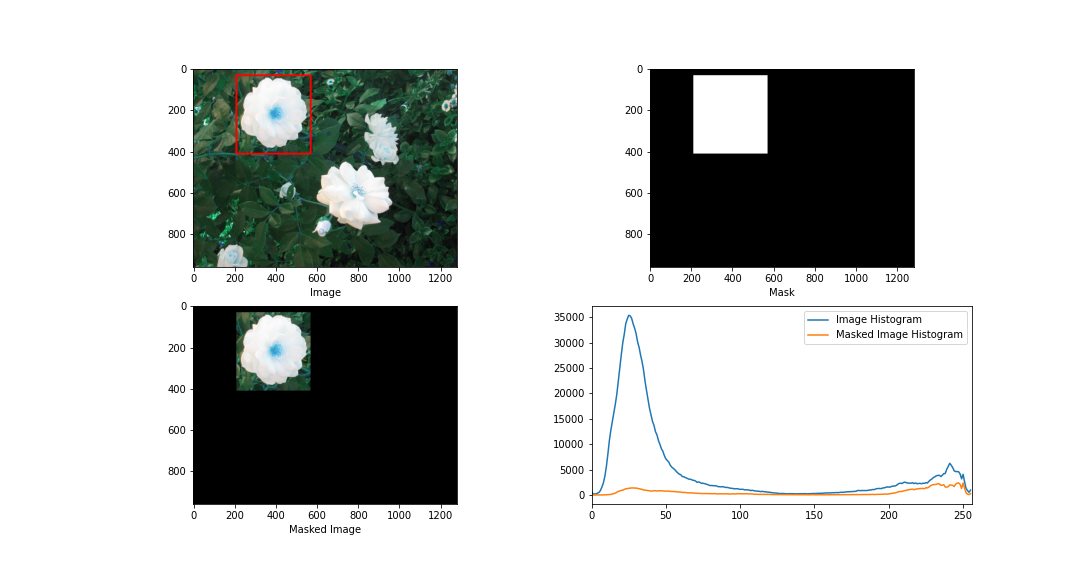</p>
<Figcaption>Figure 5: Image masking steps </Figcaption>
</center>
</image>


Let's write a code to do exactly the same steps. 


In [1]:
# Importing OpenCV and others Libraries
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from IPython.display import display, Image

Read the image.


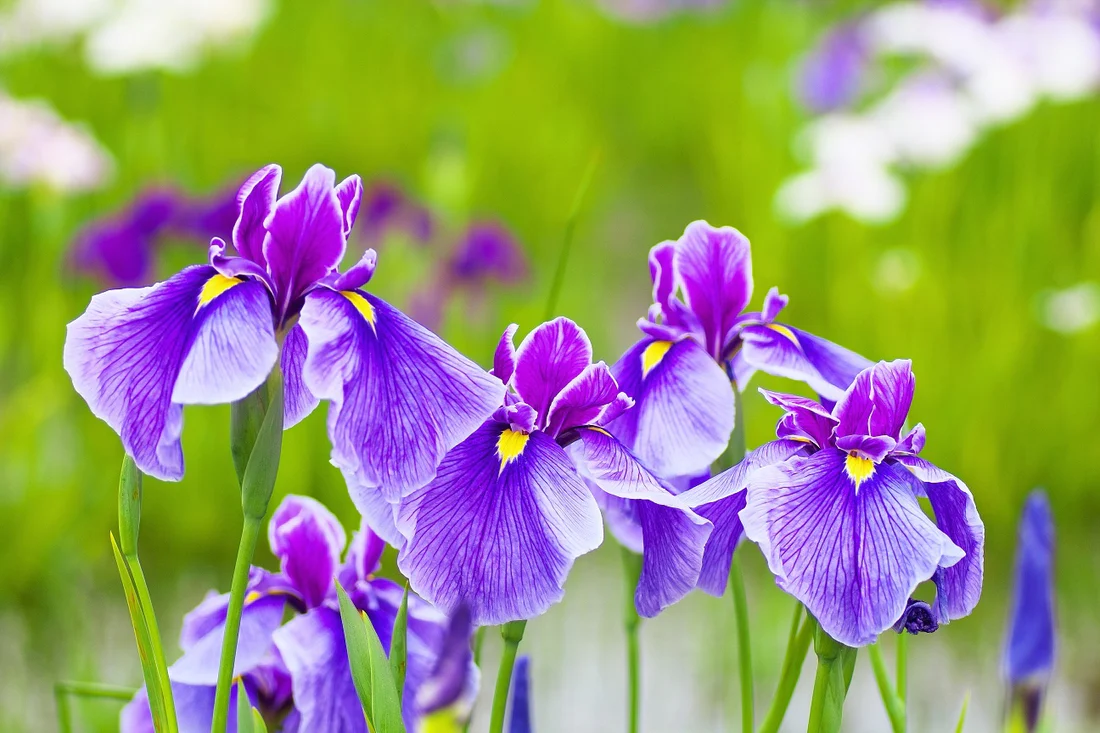

In [3]:
image = cv2.imread('flower.jpg')

# Checking if the image was read successfully
if image is None:
    print("Image not found or invalid format")
else:
    # Display the image using IPython.display
    display(Image(filename='flower.jpg'))

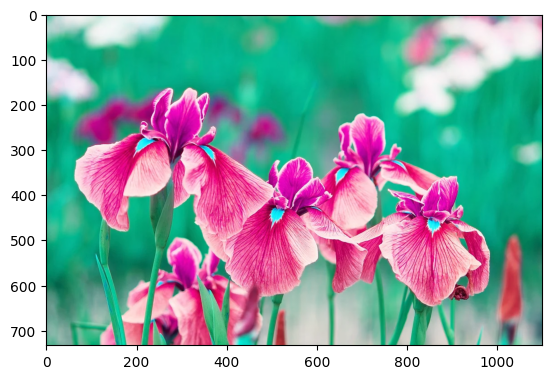

In [4]:
plt.imshow(image)

First let me show how you can plot the red rectangle on the image.  

I will copy the image on `annoted_image` variable becase plotting shapes on image changes orginal image. 


In [6]:
annoted_image = image.copy()

In OpenCV we can draw a rectangle on the image using [cv2.rectangle()]

We will need two points to plot the rectangle.  
* Top-left corner  
    * In our problem top left corner is 50 on the x-axis and 130 on the y-axis. So the coordinate is (50,130).
* Bottom-right corner:
     * In our problem bottom right corner is 510 on the x-axis and 530 on the y-axis. So the coordinate is (510,530).


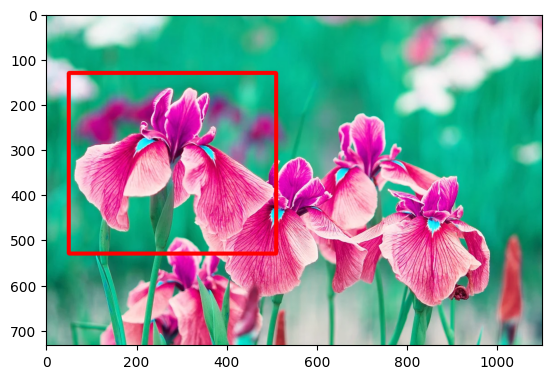

In [7]:
cv2.rectangle(annoted_image, pt1=(50,130),  pt2=(510,530),color= (255,0,0), thickness=8)
plt.imshow(annoted_image)
plt.savefig('anootflower.png')

Let's create a Mask of the image


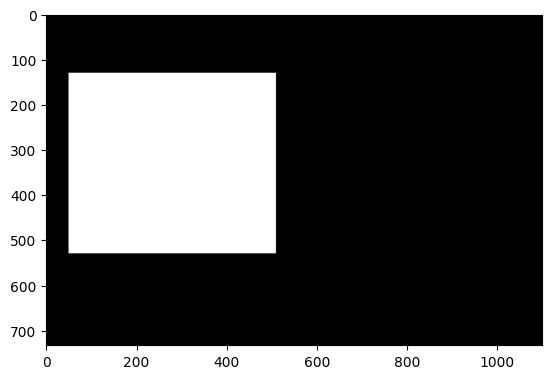

In [21]:
mask = np.zeros(image.shape[:2], np.uint8)
mask[130:530, 50:510] = 255
plt.imshow(mask, cmap='gray')
plt.savefig('mask_flower.png')

It's useful to represent binary images—images containing only black and white pixels—
using np.uint8 arrays with only `0 and 255 values` correspondingly.


Plot Image, its mask and Masked Image along with their histogram.


In [22]:
minimum_value = 0
maximum_value = 255

In [23]:
masked_img = cv2.bitwise_and(image,image,mask = mask) # creating a mask image
hist_full = cv2.calcHist([image],[minimum_value],None,[maximum_value],[minimum_value,maximum_value]) # hisogram of original image
hist_mask = cv2.calcHist([image],[minimum_value],mask,[maximum_value],[minimum_value,maximum_value]) # hisogram of masked image

Text(0.5, 0, 'Masked Image')

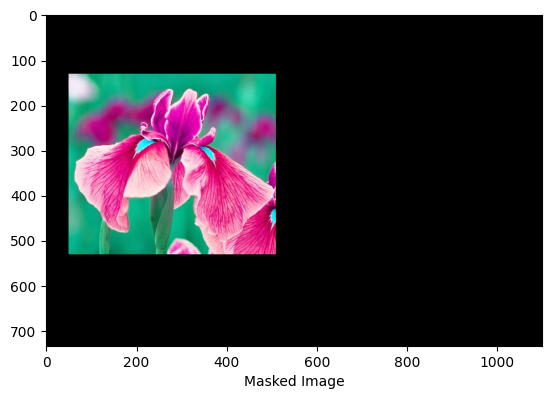

In [24]:
plt.imshow(masked_img)
plt.xlabel("Masked Image")

Text(0.5, 0, 'Masked Image histogram')

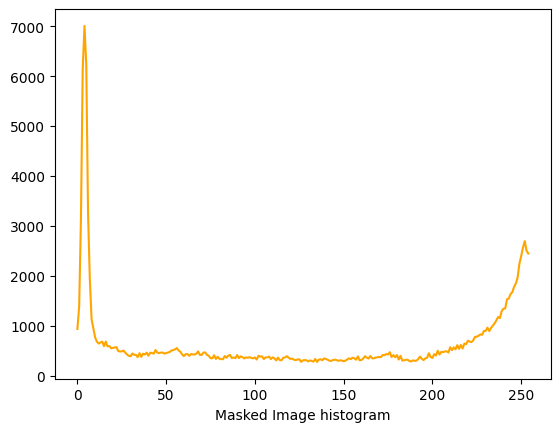

In [25]:
plt.plot(hist_mask,color='orange')
plt.xlabel("Masked Image histogram")

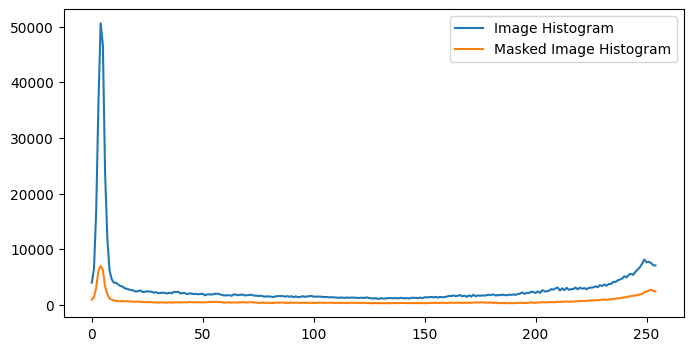

In [26]:
plt.figure(figsize=(8,4))
plt.plot(hist_full,label = "Image Histogram") 
plt.plot(hist_mask, label='Masked Image Histogram')
plt.legend(loc="upper right")
plt.savefig('comparehist.png', dpi=500)
plt.show()

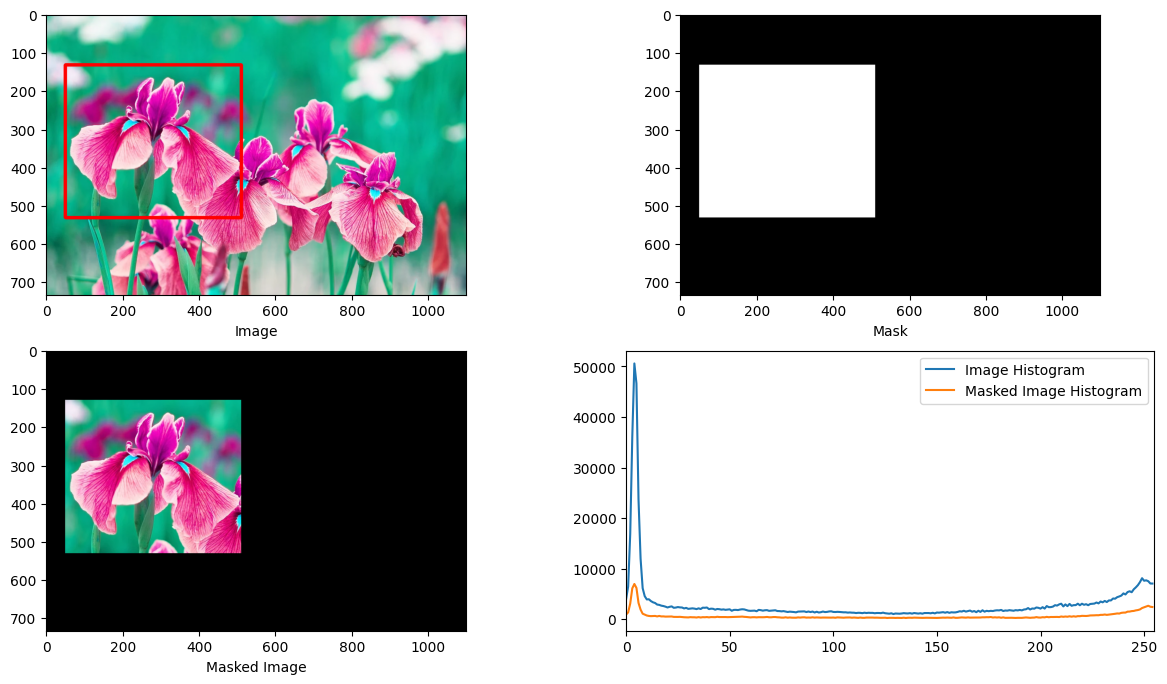

In [28]:
#Comparing the results
plt.figure(figsize=(15,8))
plt.subplot(221), plt.imshow(annoted_image, cmap='gray'),plt.xlabel("Image")
plt.subplot(222), plt.imshow(mask,cmap='gray') ,plt.xlabel("Mask")
plt.subplot(223), plt.imshow(masked_img, cmap='gray') ,plt.xlabel("Masked Image")
plt.subplot(224), plt.plot(hist_full,label = "Image Histogram"), plt.plot(hist_mask, label='Masked Image Histogram'),plt.legend(loc="upper right")
plt.xlim([minimum_value,maximum_value])
# plt.savefig("mask_and_hist.png")
plt.show()

In the previous above example, I've used a mask to focus only on the region of interest, i.e., flower using an arithmetic operator.

* One exciting application of this process is in the computer vision system to recognize faces. In face recognition problem The only part of the image we are interested in finding and describing is the parts of the image that contains faces. We can construct a mask to
show only the faces in the image, and don't care about
the rest of the image's content. 


Read the background image.


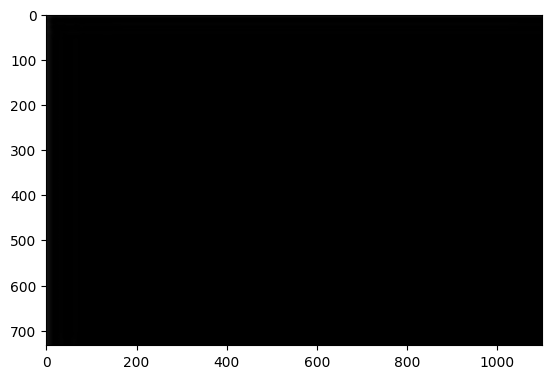

In [49]:
background = cv2.imread('black.jpg')
background = cv2.resize(background, (img.shape[1], img.shape[0]))
plt.imshow(background)

Make a masked image.


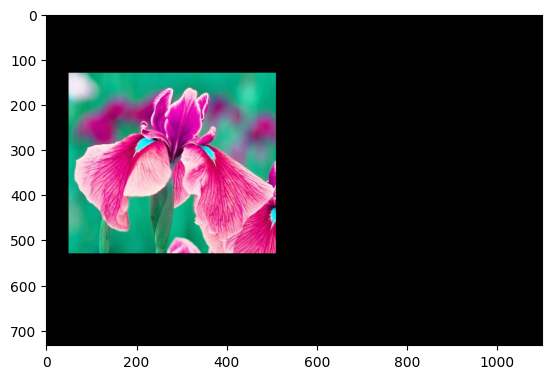

In [50]:
img = cv2.imread('flower.jpg',1)
mask = np.zeros(img.shape, np.uint8)
mask[130:530, 50:510] = 255
masked_image = cv2.bitwise_and(img, mask)
plt.imshow(masked_image)

## Different Logical operation on Mask

We can find exciting regions by applying logical operations on different masks. Let's see some examples.


### Logical AND


Suppose you want to create a mask including an arc of the circle on the top left side. You can create this by applying logical AND operation.


<image>
<center>


<p>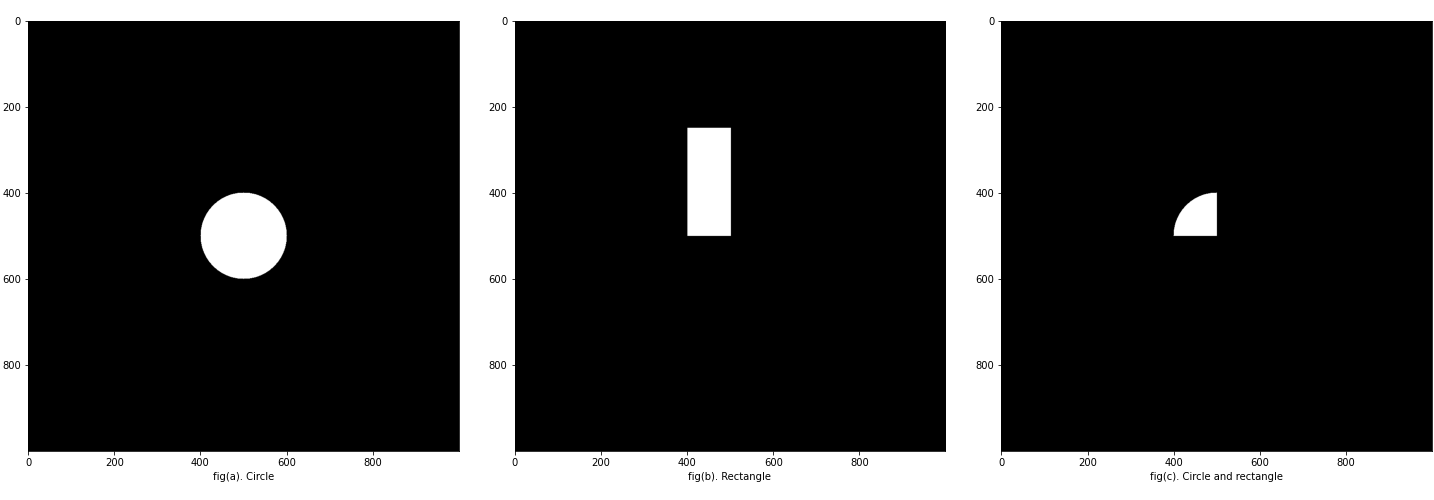</p>
<Figcaption>Figure 6: Image mask with arc </Figcaption>
</center>
</image>


__Example:__


_Create a synthetic binary image with a circle mask._


Define the shape of the mask with a circle.


In [55]:
length=1000
breadth = 1000

Create a circle mask.


In [56]:
circle_image = np.zeros((length, breadth), np.uint8) # zero is black

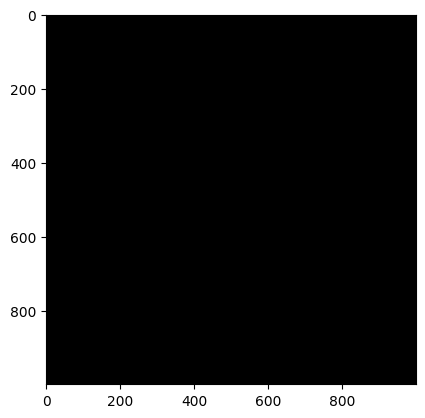

In [57]:
plt.imshow(circle_image,cmap='gray')

_Let's make a circle inside this image, the circle has it's centre on `(500,500)` with the radius of `100`._


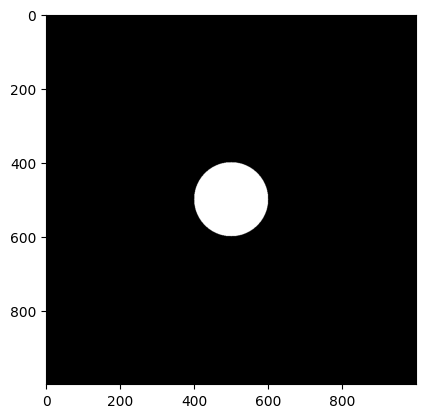

In [58]:
centre = (500, 500) 
radius = 100
cv2.circle(circle_image, centre, radius, 255, -1) # 1 is white
plt.imshow(circle_image,cmap='gray')

_Similarly make rectangle._


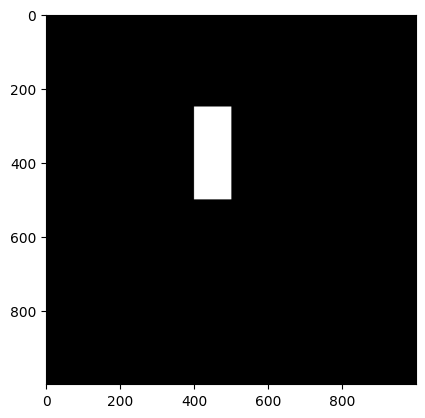

In [59]:
rect_image = np.zeros((length, breadth), np.uint8)
# Start coordinate, 
# represents the top left corner of rectangle 
Start_coordinate = (400, 250) 
# Ending coordinate, 
# represents the bottom right corner of rectangle 
Ending_coordinate = (500, 500)
cv2.rectangle(rect_image, Start_coordinate, Ending_coordinate, 255, -1) # make rectangle inside rect_image with white inside
plt.imshow(rect_image,cmap='gray')

Mask using Bitwise AND.


_Combine the circle and rectangle masks using a bitwise AND operator:_


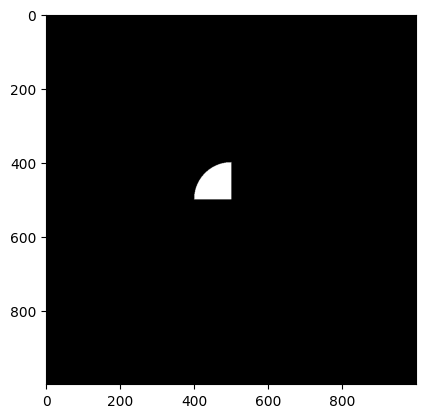

In [60]:
# circle_and_rect_image = circle_image & rect_image
circle_and_rect_image = cv2.bitwise_and(circle_image,\
                                        rect_image,\
                                        mask = None) 
plt.imshow(circle_and_rect_image, cmap='gray')

Truth Table

| A        | B           | A & B  |
| ------------- |:-------------:| -----:|
| 0     | 0 | 0 |
| 0      | 1     |  0|
| 1| 0      |   0 |
| 1| 1     |    1 |



<!-- <img src="https://drive.google.com/uc?export=view&id=1IL6-cl0J_jjSbcTf9zT26v-lNYGczkcK"/> -->



$$
    AND(x,y)= 
\begin{cases}
    1,& \text{if both x and y are 1}\\
    0,              & \text{Otherwise}
\end{cases}
\
$$



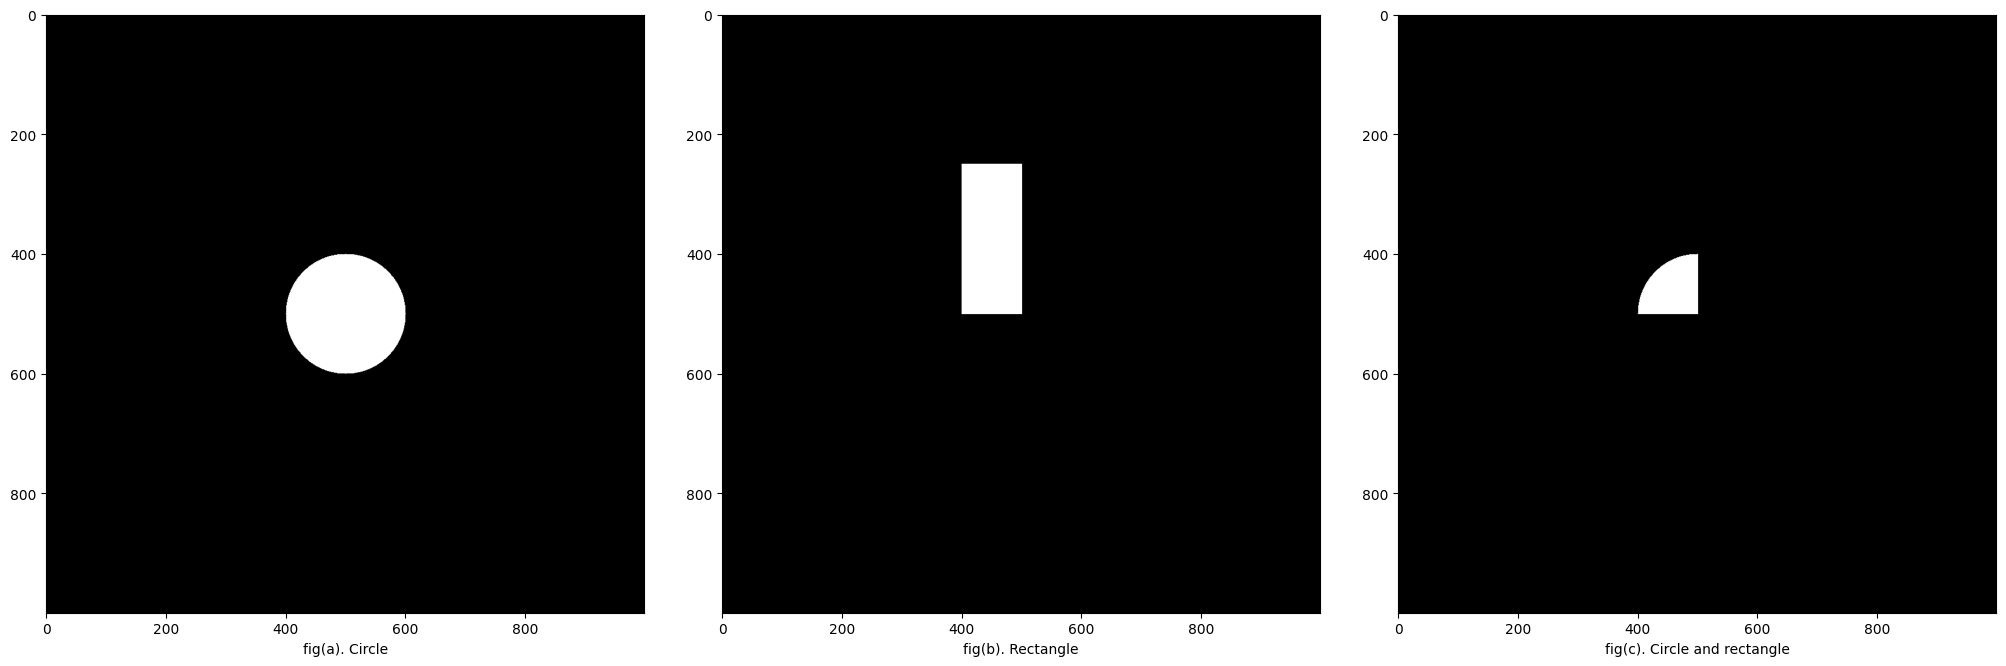

In [61]:
#@title Plot Results
f, axes = plt.subplots(1, 3, figsize=(20,12))
axes[0].imshow(circle_image, cmap='gray')
axes[1].imshow(rect_image, cmap='gray')
axes[2].imshow(circle_and_rect_image, cmap='gray')
plt.setp(axes[0], xlabel='fig(a). Circle')
plt.setp(axes[1], xlabel='fig(b). Rectangle')
plt.setp(axes[2], xlabel='fig(c). Circle and rectangle')
plt.tight_layout(pad=0.5, h_pad=3, w_pad=3)
plt.savefig("logical_and_mask.png")


- _In the figure, you can make sense that Bitwise AND operation on two images results from a arc. It's because in Bitwise AND operation, if both values are 1(white), then the result is white. i.e., If one input is black, the output is black._


### Mask Using Bitwise OR


Suppose you want to create a mask with a `b` shaped structure. You can create this by applying logical OR operation.





_Combine the circle and rectangle masks using a bitwise OR operator_


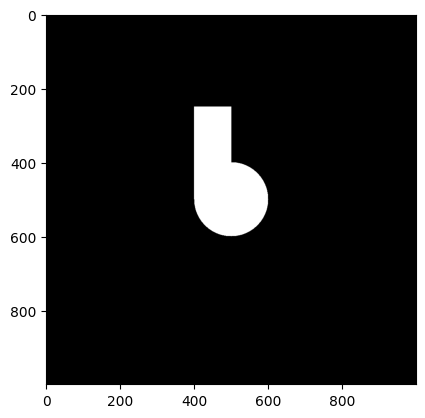

In [62]:
#Combine the circle and rectangle masks using a bitwise OR operator:
circle_or_rect_image = circle_image | rect_image
plt.imshow(circle_or_rect_image,cmap='gray')

Truth Table:


| A        | B           | A $|$ B  |
| ------------- |:-------------:| -----:|
| 0     | 0 | 0 |
| 0      | 1     |  1 |
| 1| 0      |   1 |
| 1| 1     |    1 |


<!-- 

<img src="https://drive.google.com/uc?export=view&id=1yJx6oKQ5AcQzlhj2wDoQwXVXOJHumcPO"/> -->


$$
    OR(x,y)= 
\begin{cases}
    1,& \text{if either x or y (or both x and y ) is 1}\\
    0,              & \text{Otherwise}
\end{cases}
\
$$



_Let's Visualize the results:_


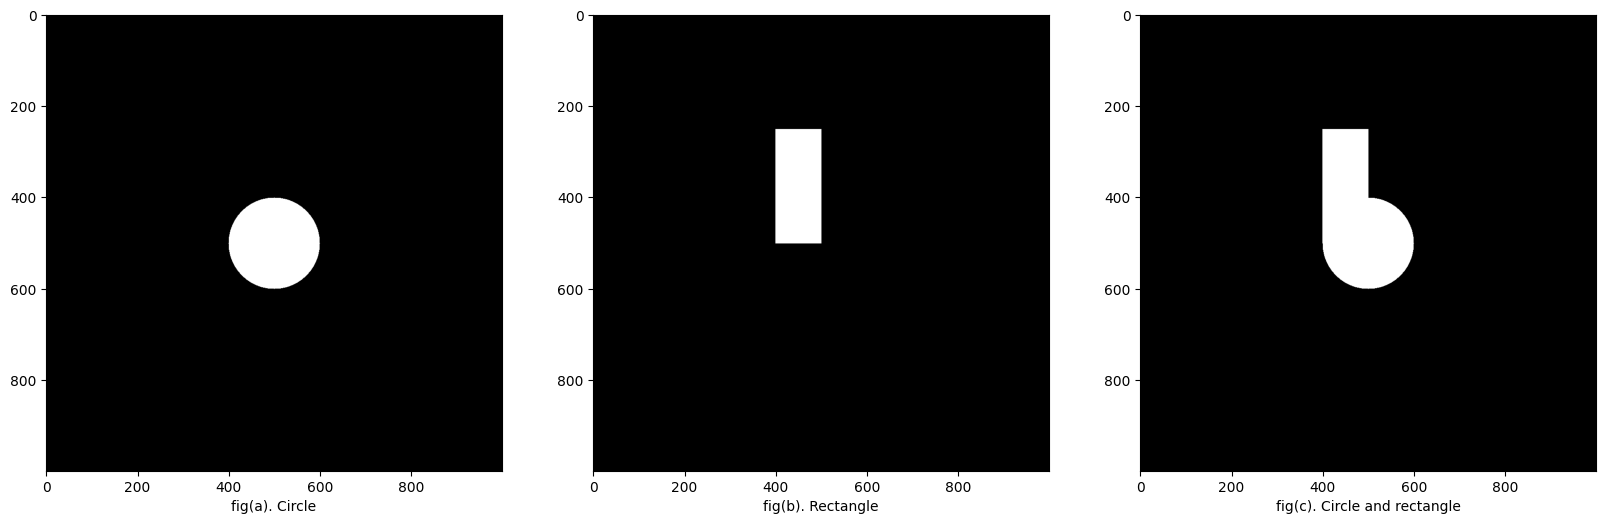

In [63]:
#@title Plot Results
f, axes = plt.subplots(1, 3, figsize=(20,12))
axes[0].imshow(circle_image, cmap='gray')
axes[1].imshow(rect_image, cmap='gray')
axes[2].imshow(circle_or_rect_image, cmap='gray')
plt.setp(axes[0], xlabel='fig(a). Circle')
plt.setp(axes[1], xlabel='fig(b). Rectangle')
plt.setp(axes[2], xlabel='fig(c). Circle and rectangle')
# plt.tight_layout(pad=0.5, h_pad=3, w_pad=3)
plt.savefig("logical_or_mask.png")




- _In Bitwise OR operation, if any of the input is white(1), then output is white. i.e., If any of the data is black, then output is black. That is why you've got a `b` shaped mask._


Both OpenCV and NumPy support all
usual binary operators: `NOT, AND, OR, and XOR.` They are available through aliases, such as `~, &, |, ^,` as well as
through functions such as `cv2.bitwise_not/np.bitwise_not` and `cv2.bitwise_and/np.bitwise_and`.


## Key Take-Aways

- A mask is a binary image consisting of zero- and non-zero values.

- If a mask is applied to a grayscale image of the same size, all the black part of mask are set to zero in the output image. All others remain unchanged. 


- You can apply bitwise operation on Mask.



$$
    AND(x,y)= 
\begin{cases}
    1,& \text{if both x and y are 1}\\
    0,              & \text{Otherwise}
\end{cases}
\
$$







$$
    OR(x,y)= 
\begin{cases}
    1,& \text{if either x or y (or both x and y ) is 1}\\
    0,              & \text{Otherwise}
\end{cases}
\
$$
